
OASIS INFOBYTE DATASCIENCE INTERNSHIP TASK 5 ADITI SAWANT SALES PREDICTION USING PYTHON

In [2]:
import numpy as np  #linear algebra
import pandas as pd  #data processing 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Advertising.csv")  #read dataset

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.tail()  #returns last 5 entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
#returns tuple of shape (Rows, columns) of dataframe
df.shape

(200, 5)

In [10]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [11]:
#prints information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
#returns numerical description of the data in the dataframe
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [14]:
#dropping the column 'Unnamed: 0'
df=df.drop(columns=["Unnamed: 0"])

In [15]:
df  #return dataframe

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
x=df.iloc[:, 0:-1]

In [17]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y=df.iloc[:,-1]

In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [21]:
x_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
138,43.0,25.9,20.5
155,4.1,11.6,5.7
82,75.3,20.3,32.5
160,172.5,18.1,30.7
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [22]:
x_test

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3
188,286.0,13.9,3.7
183,287.6,43.0,71.8
10,66.1,5.8,24.2
128,220.3,49.0,3.2
62,239.3,15.5,27.3


In [23]:
y_train

116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
       ... 
58     23.8
21     12.5
49      9.7
64     18.0
68     18.9
Name: Sales, Length: 160, dtype: float64

In [24]:
y_test

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
Name: Sales, dtype: float64

In [25]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [26]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [30]:
y_pred=lr.predict(x_test_scaled)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.9222988021105912

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

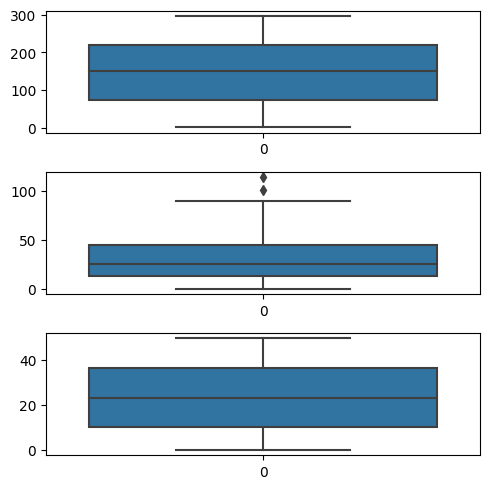

In [34]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Newspaper'], ax=axs[1])
plt3=sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

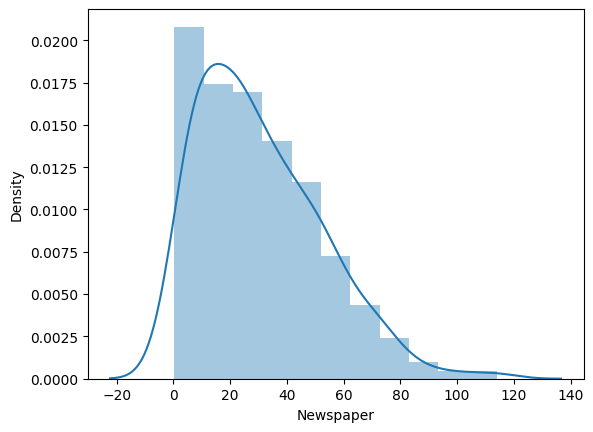

In [35]:
sns.distplot(df['Newspaper'])

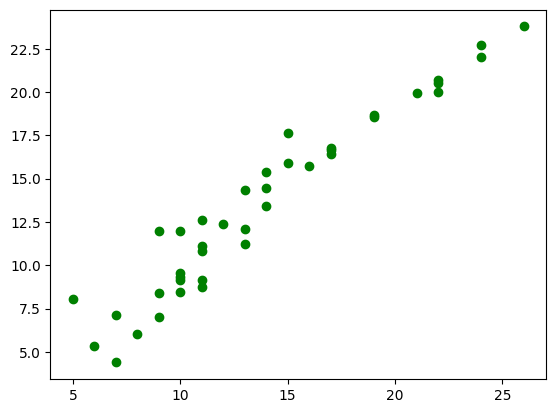

In [36]:
plt.scatter(y_test,y_pred,c='g')

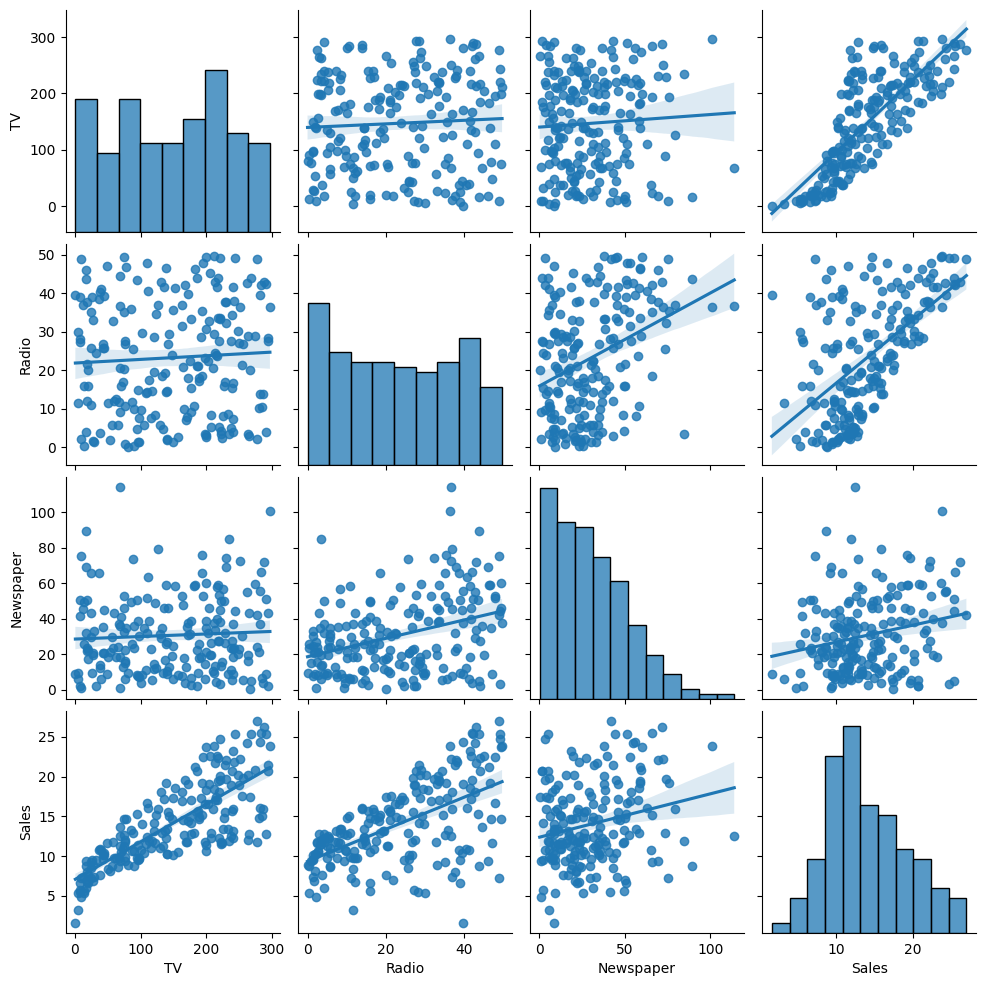

In [37]:
sns.pairplot(df,kind="reg");

<Axes: xlabel='Newspaper', ylabel='Sales'>

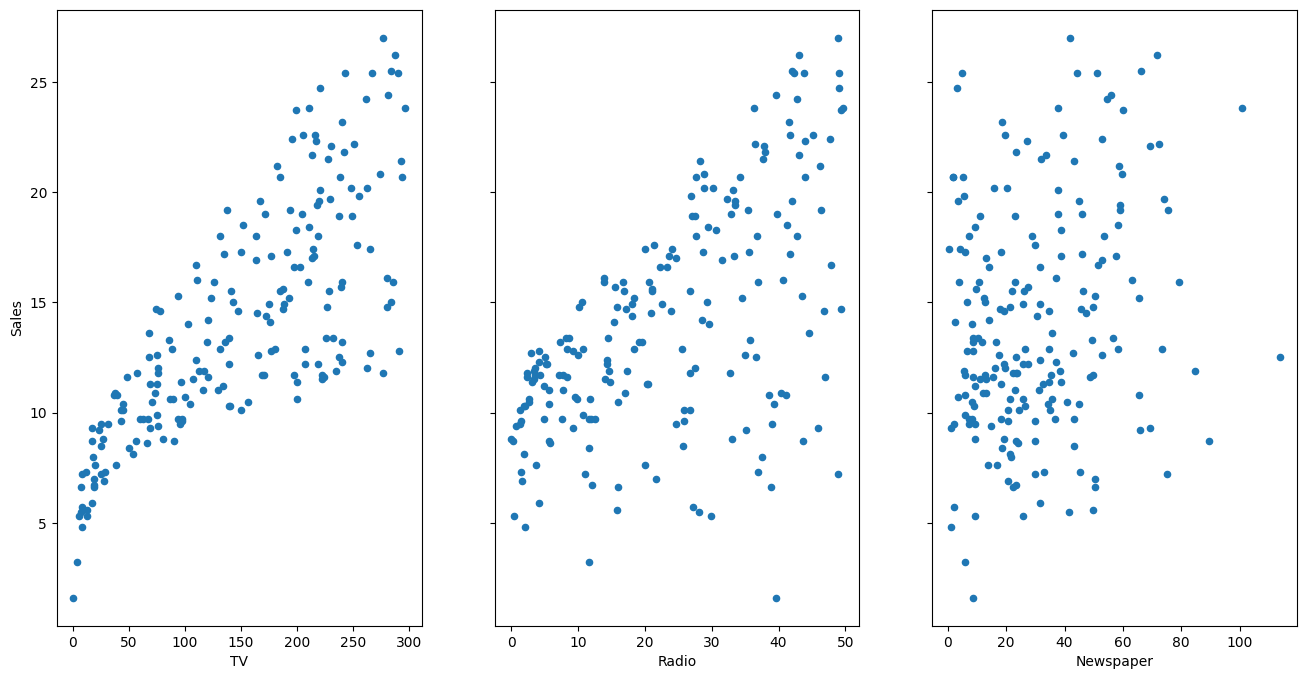

In [38]:
fig,axs= plt.subplots(1,3,sharey=True)
df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

In [39]:
#removing the outlier from newspaper

df=df[df['Newspaper']<=90]
df.shape

(198, 4)

In [40]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [41]:
# Separating input and output data

x=df.drop(columns=['Sales'])
y=df['Sales']

In [42]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [43]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [44]:

from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_train.tail()

,TV,Radio,Newspaper
118,125.7,36.9,79.2
148,38.0,40.3,11.9
50,199.8,3.1,34.6
112,175.7,15.4,2.4
145,140.3,1.9,9.0


In [47]:
y_test.tail()

190    10.8
194    17.3
184    17.6
58     23.8
76      6.9
Name: Sales, dtype: float64

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [49]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [50]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.976118758334267